<a href="https://colab.research.google.com/github/aquinojoeanson/Capstone_Project_3/blob/main/Version_2_Machine_Learning__NLP_Amazon_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets:

The Amazon dataset contains the customer reviews from http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/

* asin - Unique ID of the product being reviewed, string

* helpful - A list with two elements: the number of users that voted helpful, and the total number of users that voted on the review (including the not helpful votes), list

* overall - The reviewer's rating of the product, int64

* reviewText - The review text itself, string

* reviewerID - Unique ID of the reviewer, string

* reviewerName - Specified name of the reviewer, string

* summary - Headline summary of the review, string

* unixReviewTime - Unix Time of when the review was posted, string
* label - Positive or Negative review

# Import Data #

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
import pickle
import os

# For Data Preprocessing
from sklearn.model_selection import train_test_split

# For Model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# For Model Evaluation
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_roc_curve, auc
#from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [ ]:
model_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/modelWV_df.csv")

dataset = "reviews_Electronics_5.json"

if os.path.isfile(dataset):
   df = pd.read_json("reviews_Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)


# Dealing with Nan's

In [ ]:
nan_list = model_df[model_df.apply(lambda row: any(row.isna()), axis=1)].index
nan_list = nan_list.tolist()

print(nan_list[0:50])

[]


In [ ]:
print(*[tokenized[blank] for blank in nan_list[0:5]])

In [ ]:
for blank in nan_list[0:5]:
    display(df["reviewText"].iloc[blank])

In [ ]:
#print(f"Original 'model_df' count: {len(model_df)}")
#print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")

model_df["label"] = df["overall"]
model_df = model_df.dropna(axis=0)
display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.042715,0.449554,-0.058469,-0.210948,0.221794,-0.406341,0.152388,0.559175,-0.487808,-0.415364,...,0.166407,-0.031325,-0.102957,0.845048,0.180261,0.347787,-0.633866,0.123177,0.221894,5
1,-0.058009,0.447886,-0.060280,-0.213946,0.239694,-0.400263,0.140340,0.551776,-0.484460,-0.416487,...,0.165706,-0.031013,-0.115166,0.828764,0.180414,0.361801,-0.627044,0.112354,0.219076,1
2,-0.042507,0.462787,-0.075884,-0.228007,0.244245,-0.383637,0.138473,0.547498,-0.502998,-0.400627,...,0.175365,-0.023077,-0.118382,0.855374,0.179828,0.377723,-0.637077,0.138037,0.214269,3
3,-0.051971,0.446820,-0.068522,-0.217371,0.231471,-0.385490,0.139727,0.540269,-0.464324,-0.403209,...,0.161128,-0.030951,-0.107705,0.821246,0.169571,0.358834,-0.618393,0.120148,0.203459,2
4,-0.046612,0.502452,-0.093345,-0.246627,0.276240,-0.374039,0.146505,0.557952,-0.554885,-0.401337,...,0.166933,-0.031728,-0.136688,0.906143,0.160617,0.422900,-0.666479,0.145003,0.250361,1


In [ ]:
# changing row index from 1 instead of zero without creating an additional column
#model_df.index = np.arange(1, len(model_df) + 1)

In [ ]:
# changing row index from 1 instead of zero without creating an additional column
df.index = np.arange(1, len(df) + 1)

In [ ]:
class_counts = model_df['label'].value_counts()
class_counts

5    781
4    248
3    121
1    113
2     58
Name: label, dtype: int64

In [ ]:
type(class_counts)

pandas.core.series.Series

In [ ]:
class_percentages = pd.Series([(x / model_df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    59.121877
1    18.773656
2     9.159727
3     8.554126
4     4.390613
dtype: float64

In [ ]:
X = model_df.iloc[:, :-1].values #features
y = model_df.iloc[:, -1].values #label

Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state = 2, stratify=y)

Text(0.5, 1.0, 'Distribution of Product Rating')

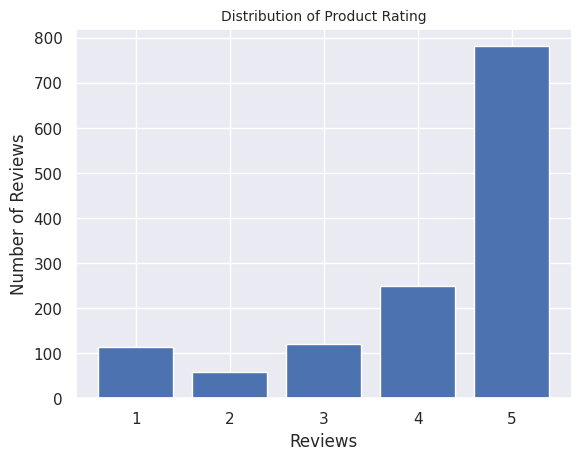

In [ ]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([1,2,3,4,5])
#ax.set_xticklabels(class_percentages.index.astype(str))
ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Reviews')
ax.set_title('Distribution of Product Rating',
              fontsize = 10)
#plt.show()

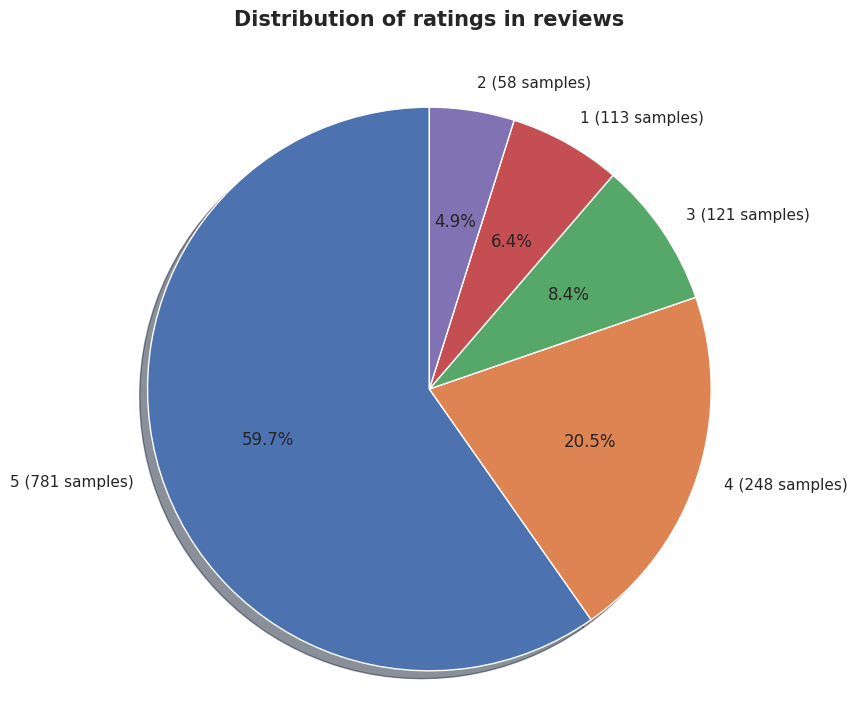

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({model_df["label"].value_counts()[k]} samples)' for k in model_df['label'].value_counts().keys()]
sizes = dict(df['overall'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distribution of ratings in reviews",pad=40, fontweight='bold', fontsize=15)
plt.show();

# Logistic Regression Model

In [ ]:
# Build and fit Logistic Regression model
logreg = LogisticRegression()
logreg = logreg.fit(Xlr, ylr)

In [ ]:
def get_model_accuracy(model, Xtestlr, ytestlr):
    """
    Return the mean accuracy of model on X_test and y_test
    """
    logreg_accuracy= logreg.score(Xtestlr, ytestlr)
    return logreg_accuracy

In [ ]:
# Accuracy in Logistic Regression model
logreg_accuracy = get_model_accuracy(logreg, Xtestlr, ytestlr)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4}')
print()

# Predict class for X_test
y_predict_logreg = logreg.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(logreg,open(newfilename_pickle,'wb'))

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = logreg.predict(Xlr)

# Classification Report of logistic regression model
print(classification_report(y_predict_logreg, ytestlr))

Logistic Regression Accuracy: 0.5921

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       1.00      0.59      0.74       331

    accuracy                           0.59       331
   macro avg       0.20      0.12      0.15       331
weighted avg       1.00      0.59      0.74       331



## Logistic Regression with GridSearchCV

In [ ]:
def get_best_parameters_GridSearchCV(logreg, params, Xlr, ylr):
    logreg = GridSearchCV(logreg, params, cv=5)
    logreg.fit(Xlr, ylr)

    best_params = logreg.best_params_
    print(f'Best Parameters in {logreg}: {best_params}')
    print()

    best_estimator = logreg.best_estimator_
    return best_estimator

In [ ]:
params_logreg = {'penalty': ['l1', 'l2', 'elasticnet'],
                 'C': np.logspace(-4, 4, 20),
                 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
# Build and fit parameter tuned Logistic Regression model
logreg_gscv = get_best_parameters_GridSearchCV(logreg, params_logreg, Xlr, ylr)
logreg_gscv = logreg_gscv.fit(Xlr, ylr)

# Accuracy test score for logreg_cv
logreg_gscv_accuracy = get_model_accuracy(logreg_gscv, Xtestlr, ytestlr)
print(f'Logistic Regression Model with GridSearchCV Accuracy: {logreg_gscv_accuracy:.4}')
print()

# Make prediction on test dataset
y_predict_logreg_gscv = logreg_gscv.predict(Xtestlr)

# Classification Report of logreg_cv
print(classification_report(y_predict_logreg_gscv, ytestlr))

Best Parameters in GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']}): {'C': 11.288378916846883, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression Model with GridSearchCV Accuracy: 0.5921

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
        

## Logistic Regression Table

In [ ]:
# Training set performance
LR_train_accuracy = accuracy_score(ylr, y_predict_train) # Calculate Accuracy
LR_train_precision = precision_score(ylr, y_predict_train, average=None) # Calculate Precision
LR_train_recall = recall_score(ylr, y_predict_train, average=None) # Calculate Recall
LR_train_f1 = f1_score(ylr, y_predict_train, average=None) # Calculate F1-score

# Test set performance
LR_test_accuracy = accuracy_score(ytestlr, y_predict_logreg) # Calculate Accuracy
LR_test_precision = precision_score(ytestlr, y_predict_logreg, average=None) # Calculate Precision
LR_test_recall = recall_score(ytestlr, y_predict_logreg, average=None) # Calculate Recall
LR_test_f1 = f1_score(ytestlr, y_predict_logreg, average=None) # Calculate F1-score



#Train Results
accuracy_train_list = {'Logistic_Regression': LR_train_accuracy}
precision_train_list = {'Logistic_Regression': LR_train_precision}
recall_train_list = {'Logistic_Regression': LR_train_recall}
f1score_train_list = {'Logistic_Regression': LR_train_f1}


#Test Results
accuracy_test_list = {'Logistic_Regression': LR_test_accuracy}
precision_test_list = {'Logistic_Regression': LR_test_precision}
recall_test_list = {'Logistic_Regression': LR_test_recall}
f1score_test_list = {'Logistic_Regression': LR_test_f1}


# Model performance for Training set
accuracy_train_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Train_Accuracy'])
precision_train_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Train_Precision1','Train_Precision2', 'Train_Precision3', 'Train_Precision4', 'Train_Precision5'])
recall_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Train_Recall1', 'Train_Recall2', 'Train_Recall3', 'Train_Recall4', 'Train_Recall5'])
f1_train_df = pd.DataFrame.from_dict(f1score_train_list, orient='index', columns=['Train_F1-score1', 'Train_F1-score2', 'Train_F1-score3', 'Train_F1-score4', 'Train_F1-score5'])

#Model performance for Test set
accuracy_test_df = pd.DataFrame.from_dict(accuracy_test_list, orient='index', columns=['Test_Accuracy'])
precision_test_df = pd.DataFrame.from_dict(precision_test_list, orient='index', columns=['Test_Precision1','Test_Precision2', 'Test_Precision3', 'Test_Precision4', 'Test_Precision5'])
recall_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index',  columns=['Test_Recall1', 'Test_Recall2', 'Test_Recall3', 'Test_Recall4', 'Test_Recall5'])
f1_test_df = pd.DataFrame.from_dict(f1score_test_list, orient='index', columns=['Test_F1-score1', 'Test_F1-score2', 'Test_F1-score3', 'Test_F1-score4', 'Test_F1-score5'])
LR_df = pd.concat([accuracy_train_df, accuracy_test_df, precision_train_df, precision_test_df, recall_train_df, recall_test_df, f1_train_df, f1_test_df], axis=1)
LR_df

,Train_Accuracy,Test_Accuracy,Train_Precision1,Train_Precision2,Train_Precision3,Train_Precision4,Train_Precision5,Test_Precision1,Test_Precision2,Test_Precision3,...,Train_F1-score1,Train_F1-score2,Train_F1-score3,Train_F1-score4,Train_F1-score5,Test_F1-score1,Test_F1-score2,Test_F1-score3,Test_F1-score4,Test_F1-score5
Logistic_Regression,0.590909,0.592145,0.0,0.0,0.0,0.0,0.590909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.742857,0.0,0.0,0.0,0.0,0.743833


In [ ]:
# Training set performance
LR_train_accuracy = accuracy_score(ylr, y_predict_train) # Calculate Accuracy
LR_train_precision = precision_score(ylr, y_predict_train, average='micro')
LR_train_recall = recall_score(ylr, y_predict_train, average='micro')
LR_train_f1 = f1_score(ylr, y_predict_train, average='micro')


In [ ]:
# Test set performance
LR_test_accuracy = accuracy_score(ytestlr, y_predict_logreg) # Calculate Accuracy
LR_test_precision = precision_score(ytestlr, y_predict_logreg, average=None) # Calculate Precision
LR_test_recall = recall_score(ytestlr, y_predict_logreg, average=None) # Calculate Recall
LR_test_f1 = f1_score(ytestlr, y_predict_logreg, average=None) # Calculate F1-score

In [ ]:
#Train Results
accuracy_train_list = {'Logistic_Regression': LR_train_accuracy}
precision_train_list = {'Logistic_Regression': LR_train_precision}
recall_train_list = {'Logistic_Regression': LR_train_recall}
f1score_train_list = {'Logistic_Regression': LR_train_f1}

In [ ]:
#Test Results
accuracy_test_list = {'Logistic_Regression': LR_test_accuracy}
precision_test_list = {'Logistic_Regression': LR_test_precision}
recall_test_list = {'Logistic_Regression': LR_test_recall}
f1score_test_list = {'Logistic_Regression': LR_test_f1}

In [ ]:
# Model performance for Training set
accuracy_train_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Train_Accuracy'])
precision_train_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Train_Precision'])
recall_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Train_Recall'])
f1_train_df = pd.DataFrame.from_dict(f1score_train_list, orient='index', columns=['Train_F1-score'])

In [ ]:
#Model performance for Test set
accuracy_test_df = pd.DataFrame.from_dict(accuracy_test_list, orient='index')
precision_test_df = pd.DataFrame.from_dict(precision_test_list, orient='index')
recall_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index')
f1_test_df = pd.DataFrame.from_dict(f1score_test_list, orient='index')

LR_df = pd.concat([accuracy_train_df, accuracy_test_df, precision_train_df, precision_test_df, recall_train_df, f1_test_df], axis=1)
LR_df = pd.concat([accuracy_test_df, precision_test_df], axis=1)
LR_df = pd.concat([LR_df, recall_test_df], axis=1)
LR_df = pd.concat([accuracy_test_df, precision_test_df, recall_test_df, f1_test_df], axis=1)
LR_df

,0,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4
Logistic_Regression,0.592145,0.0,0.0,0.0,0.0,0.592145,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.743833


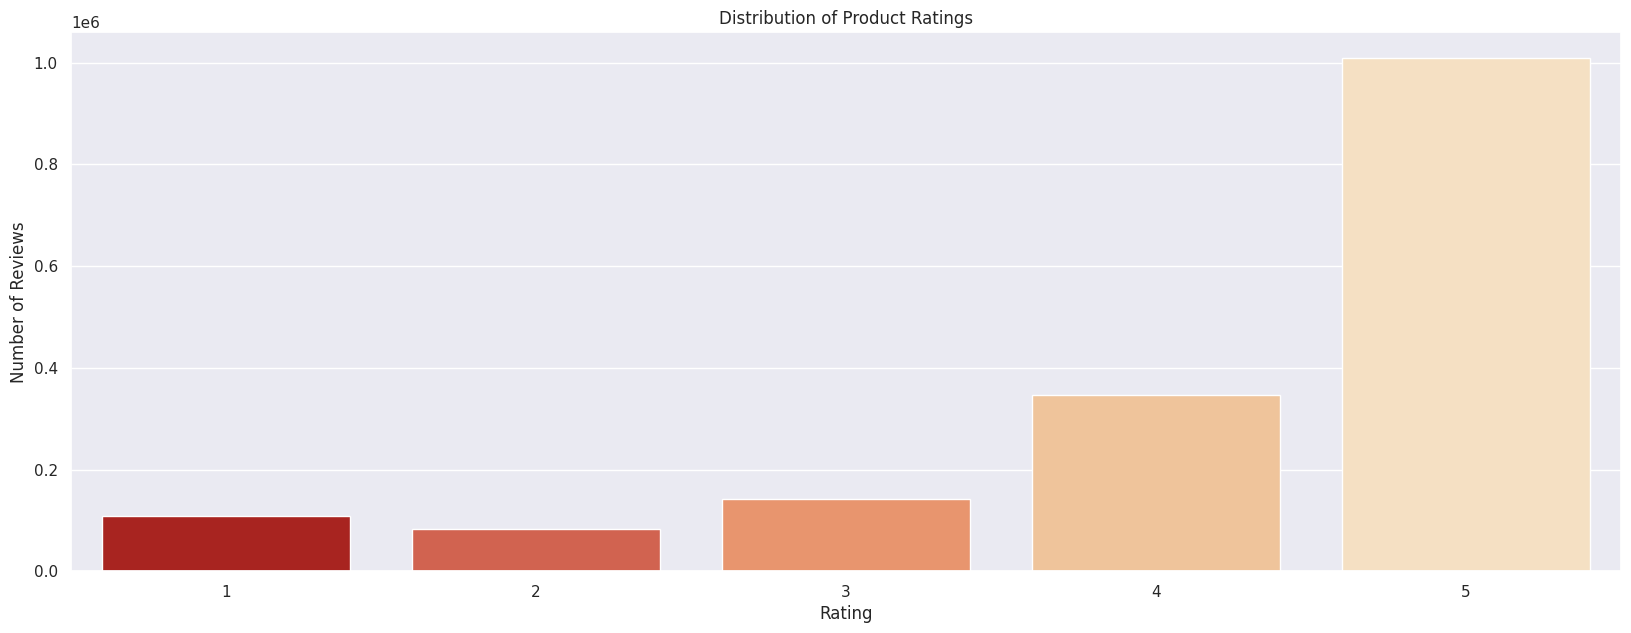

In [ ]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["overall"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

# Light GBM

In [ ]:
import lightgbm as lgb

# Build and fit LightGBM model
LGB = lgb.LGBMClassifier()
LGB.fit(Xlr, ylr)

LGBMClassifier()

In [ ]:
def get_model_accuracy(LGB, Xtestlr, ytestlr):
    """
    Return the mean accuracy of model on X_test and y_test
    """
    LGB_accuracy= LGB.score(Xtestlr, ytestlr)
    return LGB_accuracy

In [ ]:
# Accuracy in LGBM model
LGB_accuracy = get_model_accuracy(LGB, Xtestlr, ytestlr)
print(f'LGBM Accuracy: {LGB_accuracy:.4}')
print()

# Predict class for X_test
y_predict_LGB = LGB.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(LGB,open(newfilename_pickle,'wb'))

LGB_cm_test = confusion_matrix(y_predict_LGB, ytestlr)

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = LGB.predict(Xlr)

# Classification Report of logistic regression model
print(classification_report(y_predict_LGB, ytestlr))

LGBM Accuracy: 0.5468

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.08      0.19      0.11        27
           5       0.90      0.59      0.71       299

    accuracy                           0.55       331
   macro avg       0.20      0.15      0.16       331
weighted avg       0.82      0.55      0.65       331



## LGBM with GridSearchCV

In [ ]:
def get_best_parameters_GridSearchCV(LGB, params, Xlr, ylr):
    LGB = GridSearchCV(LGB, params, cv=5)
    LGB.fit(Xlr, ylr)

    best_params = LGB.best_params_
    print(f'Best Parameters in {LGB}: {best_params}')
    print()

    best_estimator = LGB.best_estimator_
    return best_estimator

In [ ]:
params_LGB = {'learning_rate': [0.1, 0.01],
        'n_estimators': [50, 100, 150],
        'max_depth': [4, 6],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'subsample': [0.7, 0.8, 0.9],
        'min_child_samples': [1, 5, 10]}

In [ ]:
# Build and fit Random Forest model with the best hyperparameters
LGB_gscv = get_best_parameters_GridSearchCV(LGB, params_LGB, Xlr, ylr)
LGB_gscv = LGB_gscv.fit(Xlr, ylr)

# Accuracy score for rf_gscv
LGB_gscv_accuracy = get_model_accuracy(LGB_gscv, Xtestlr, ytestlr)
print(f'LGBM with GridSearchCV Accuracy: {LGB_gscv_accuracy:.4}')
print()

# Make prediction on test dataset
y_predict_LGB_gscv = LGB_gscv.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(logreg,open(newfilename_pickle,'wb'))

LGB_cm_test = confusion_matrix(y_predict_LGB_gscv, ytestlr)

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = LGB.predict(Xlr)

# Classification Report of grid_rf_model
print(classification_report(y_predict_LGB_gscv, ytestlr))

Best Parameters in GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.1, 0.01], 'max_depth': [4, 6],
                         'min_child_samples': [1, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]}): {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_samples': 5, 'n_estimators': 150, 'subsample': 0.7}

LGBM with GridSearchCV Accuracy: 0.5861

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.03      0.33      0.06         6
           5       0.98      0.59      0.74       325

    accuracy                           0.59       331
   macro avg       0.20      0.18      0.16       331
weighted avg       0

## LGBM Table

In [ ]:
# Training set performance
LGB_train_accuracy = accuracy_score(ylr, y_predict_train) # Calculate Accuracy
LGB_train_precision = precision_score(ylr, y_predict_train, average='micro')
LGB_train_recall = recall_score(ylr, y_predict_train, average='micro')
LGB_train_f1 = f1_score(ylr, y_predict_train, average='micro')


In [ ]:
# Test set performance
LGB_test_accuracy = accuracy_score(ytestlr, y_predict_logreg) # Calculate Accuracy
LGB_test_precision = precision_score(ytestlr, y_predict_logreg, average=None) # Calculate Precision
LGB_test_recall = recall_score(ytestlr, y_predict_logreg, average=None) # Calculate Recall
LGB_test_f1 = f1_score(ytestlr, y_predict_logreg, average=None) # Calculate F1-score

In [ ]:
#Train Results
accuracy_train_list = {'LGBM': LR_train_accuracy}
precision_train_list = {'LGBM': LR_train_precision}
recall_train_list = {'LGBM': LR_train_recall}
f1score_train_list = {'LGBM': LR_train_f1}

In [ ]:
#Test Results
accuracy_test_list = {'LGBM': LR_test_accuracy}
precision_test_list = {'LGBM': LR_test_precision}
recall_test_list = {'LGBM': LR_test_recall}
f1score_test_list = {'LGBM': LR_test_f1}

In [ ]:
# Model performance for Training set
accuracy_train_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Train_Accuracy'])
precision_train_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Train_Precision'])
recall_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Train_Recall'])
f1_train_df = pd.DataFrame.from_dict(f1score_train_list, orient='index', columns=['Train_F1-score'])


In [ ]:
#Model performance for Test set
accuracy_test_df = pd.DataFrame.from_dict(accuracy_test_list, orient='index')
precision_test_df = pd.DataFrame.from_dict(precision_test_list, orient='index')
recall_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index')
f1_test_df = pd.DataFrame.from_dict(f1score_test_list, orient='index')

LGB_df = pd.concat([accuracy_train_df, accuracy_test_df, precision_train_df, precision_test_df, recall_train_df, f1_test_df], axis=1)
LGB_df = pd.concat([accuracy_test_df, precision_test_df], axis=1)
LGB_df = pd.concat([LGB_df, recall_test_df], axis=1)
LGB_df = pd.concat([accuracy_test_df, precision_test_df, recall_test_df, f1_test_df], axis=1)
LGB_df

,0,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4
LGBM,0.592145,0.0,0.0,0.0,0.0,0.592145,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.743833


# XGBoost

In [ ]:
#ylr= [0,1,2,3,4]

In [ ]:
# Build and fit XGBoost model
xgboost = XGBClassifier(eval_metric='None')
xgboost = xgboost.fit(Xlr, ylr)

# Accuracy score for xgb_model
xgboost_accuracy = get_model_accuracy(xgboost, Xtestlr, ytestlr)
print(f'XGBoost Classifier Accuracy: {xgboost_accuracy:.4}')
print()


# Predict class for X_test
y_predict_xgboost = xgboost.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(xgboost,open(newfilename_pickle,'wb'))

xgboost_cm_test = confusion_matrix(y_predict_xgboost, ytestlr)

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = xgboost.predict(Xlr)

# Classification Report of xgb_model
print(classification_report(y_predict_xgboost, ytestlr))

XGBoostError: ignored

In [ ]:
def get_model_accuracy(xgboost, Xtestlr, ytestlr):
    """
    Return the mean accuracy of model on X_test and y_test
    """
    xgboost_accuracy= xgboost.score(Xtestlr, ytestlr)
    return xgboost_accuracy

## XGBoost with GridSearchCV

In [ ]:
def get_best_parameters_GridSearchCV(xgboost, params, Xlr, ylr):
    xgboost = GridSearchCV(xgboost, params, cv=5)
    xgboost.fit(Xlr, ylr)

    best_params = xgboost.best_params_
    print(f'Best Parameters in {xgboost}: {best_params}')
    print()

    best_estimator = xgboost.best_estimator_
    return best_estimator


In [ ]:
params_xgboost = {'learning_rate': [4, 5, 6],
              'max_depth': [4, 5, 6],
              'min_child_weight': [4, 5, 6],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'eval_metric': ['error']}

In [ ]:
# Build and fit XGBoost Classifier model with the best parameters
xgboost_gscv = get_best_parameters_GridSearchCV(xgboost, params_xgboost, Xlr, ylr)
xgboost_gscv = xgboost_gscv.fit(Xlr, ylr)

# Accuracy score for xgb_gscv
xgboost_gscv_accuracy = get_model_accuracy(xgboost_gscv, Xtestlr, ytestlr)
print(f'XGBoost Classifier with GridSerchCV Accuracy: {xgboost_gscv_accuracy:.4}')
print()

# Predict class for X_test
y_predict_xgboost_gscv = xgboost_gscv.predict(Xtestlr)

# Classification Report of xgb_cv
print(classification_report(y_predict_xgboost_gscv, ytestlr))

ValueError: ignored

## XGBoost Table

In [ ]:
# Training set performance
xgboost_train_accuracy = accuracy_score(ylr, y_predict_train) # Calculate Accuracy
xgboost_train_precision = precision_score(ylr, y_predict_train) # Calculate Precision
xgboost_train_recall = recall_score(ylr, y_predict_train) # Calculate Recall
xgboost_train_f1 = f1_score(ylr, y_predict_train, average='weighted') # Calculate F1-score

# Test set performance
xgboost_test_accuracy = accuracy_score(ytestlr, y_predict_xgboost_gscv) # Calculate Accuracy
xgboost_test_precision = precision_score(ytestlr, y_predict_xgboost_gscv) # Calculate Precision
xgboost_test_recall = recall_score(ytestlr, y_predict_xgboost_gscv) # Calculate Recall
xgboost_test_f1 = f1_score(ytestlr, y_predict_xgboost_gscv, average='weighted') # Calculate F1-score



#Train Results
accuracy_train_list = {'XGBoost': LR_train_accuracy}
precision_train_list = {'XGBoost': LR_train_precision}
recall_train_list = {'XGBoost': LR_train_recall}
f1score_train_list = {'XGBoost': LR_train_f1}


#Test Results
accuracy_test_list = {'XGBoost': LR_test_accuracy}
precision_test_list = {'XGBoost': LR_test_precision}
recall_test_list = {'XGBoost': LR_test_recall}
f1score_test_list = {'XGBoost': LR_test_f1}


# Model performance for Training set
accuracy_train_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Train_Accuracy'])
precision_train_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Train_Precision'])
recall_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Train_Recall'])
f1_train_df = pd.DataFrame.from_dict(f1score_train_list, orient='index', columns=['Train_F1-score'])

#Model performance for Test set
accuracy_test_df = pd.DataFrame.from_dict(accuracy_test_list, orient='index', columns=['Test_Accuracy'])
precision_test_df = pd.DataFrame.from_dict(precision_test_list, orient='index', columns=['Test_Precision'])
recall_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index', columns=['Test_Recall'])
f1_test_df = pd.DataFrame.from_dict(f1score_test_list, orient='index', columns=['Test_F1-score'])
xgboost_df = pd.concat([accuracy_train_df, accuracy_test_df, precision_train_df, precision_test_df, recall_train_df, recall_test_df, f1_train_df, f1_test_df], axis=1)
xgboost_df
Train_Accuracy	Test_Accuracy	Train_Precision	Test_Precision

SyntaxError: ignored

# Confusion Matrix

In [ ]:
def plot_confusion_matrix(ytestlr, y_predict, color, title):
    """
    Confusion matrix to evaluate the accuracy of Models
    """
    cm = confusion_matrix(ytestlr, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

## Logistic Regression

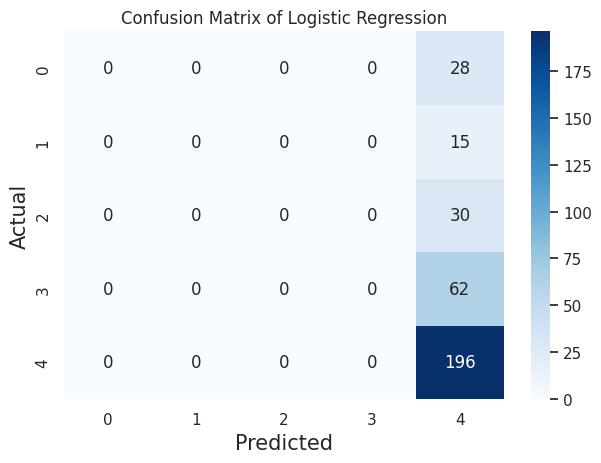

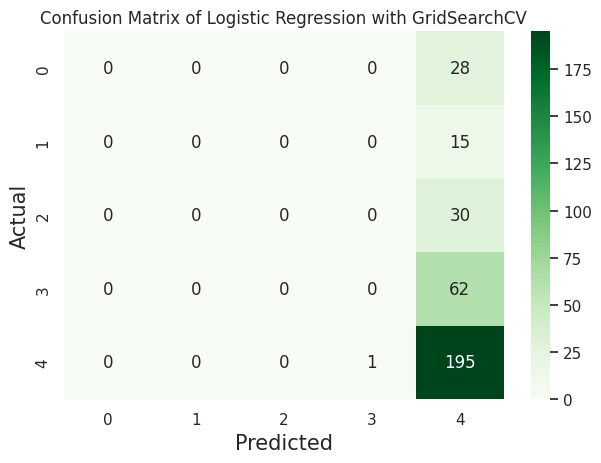

In [ ]:
title = 'Confusion Matrix of Logistic Regression'
plot_confusion_matrix(ytestlr, y_predict_logreg, 'Blues', title);

# Logistic Regression with GridSearchCV
title = 'Confusion Matrix of Logistic Regression with GridSearchCV'
plot_confusion_matrix(ytestlr, y_predict_logreg_gscv, 'Greens', title)

## LGBM Classifier

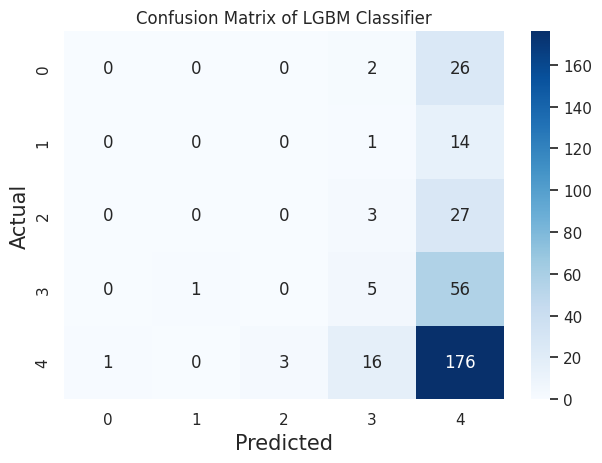

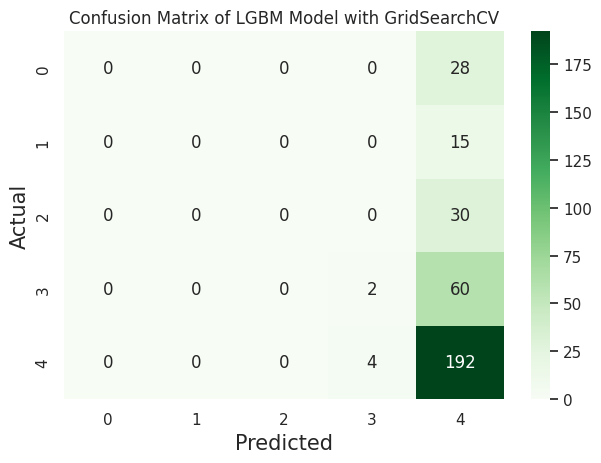

In [ ]:
title = 'Confusion Matrix of LGBM Classifier'
plot_confusion_matrix(ytestlr, y_predict_LGB, 'Blues', title);

# XGBoost Classifier with hyperparameter tuning
title = 'Confusion Matrix of LGBM Model with GridSearchCV'
plot_confusion_matrix(ytestlr, y_predict_LGB_gscv, 'Greens', title)

## XGBoost Classifier

In [ ]:
title = 'Confusion Matrix of XGBoost Classifier'
plot_confusion_matrix(ytestlr, y_predict_xgboost, 'Blues', title);

# XGBoost Classifier with hyperparameter tuning
title = 'Confusion Matrix of XGBoost Model with GridSearchCV'
plot_confusion_matrix(ytestlr, y_predict_xgboost_gscv, 'Greens', title)

NameError: ignored

# Model Comparison¶

In [ ]:
#Get test and model tuning test score for each model
# Make lits of test score for each model and a model name list
test_list = [logreg_accuracy, LGB_accuracy]
tuning_test_list = [logreg_gscv_accuracy, LGB_gscv_accuracy]
model_names = ['LogisticRegression', 'LGBM','XGBClassifier']

# Make dataframes of each test score
test_list = pd.DataFrame(test_list)
tuning_test_list = pd.DataFrame(tuning_test_list)
model_names = pd.DataFrame(model_names)

# Name each column
test_list.columns = ['Default']
tuning_test_list.columns = ['with GridSearchCV']
model_names.columns = ['model']

# Concatenate each column
over_all_score = pd.concat([model_names, test_list, tuning_test_list], axis=1)
print(over_all_score)


# Plot bar chart of each test score results
fig = go.Figure(data=[go.Bar(x=over_all_score['model'], y=over_all_score['Default'],
                             name='Test Results', texttemplate='%{y:20,.4f}',
                             textposition='outside', marker={'line': {'width': 5}}),
                      go.Bar(x=over_all_score['model'], y=over_all_score['with GridSearchCV'],
                             name='Model Tuning Test Results', texttemplate='%{y:20,.4f}',
                             textposition='outside', marker={'line': {'width': 5}})])
fig.update_layout(title_text='Test and Model Tuning Test Results for each Model',
                  title_x=0.5, title_font=dict(size=20))
fig.update_xaxes(title_text='Models', title_font={'size': 15})
fig.update_yaxes(title_text='Score', title_font={'size': 15})
fig.update_traces(marker={'line': {'color': 'Black', 'width': 1}})
fig.show()

from IPython.display import Image
img = 'newplot.jpg'
Image(url=img)
Image("/content/gdrive/MyDrive/Colab/newplot.jpg")

                model   Default  with GridSearchCV
0  LogisticRegression  0.592145           0.592145
1                LGBM  0.546828           0.586103
2       XGBClassifier       NaN                NaN


FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

# Summary Values

In [ ]:
dfSummary = pd.read_csv('/content/gdrive/MyDrive/Colab/HD_summary_report.csv')

FileNotFoundError: ignored

In [ ]:
dfSummary